# Project: Rainfall over years in Bangladesh

This dataset was taken from https://www.kaggle.com/redikod/historical-rainfall-data-in-bangladesh?select=data_monthly_rainfall.csv

## Context
Rainfall is very crucial things for any types of agricultural task. Climate related data is important to analyse agricultural and crop seeding related field, where those data can be used to show the predict the rainfall in different season also for different types of crops.
Developed application can be found from http://ml.bigalogy.com/
Paper: http://dspace.uiu.ac.bd/handle/52243/178

## Abstract
Mankind have been attempting to predict the weather from prehistory. For good reason for knowing when to plant crops, when to build and when to prepare for drought and flood. In a nation such as Bangladesh being able to predict the weather, especially rainfall has never been so vitally important.
The proposed research work pursues to produce prediction model on rainfall using the machine learning algorithms. The base data for this work has been collected from Bangladesh Meteorological Department. It is mainly focused on the development of models for long term rainfall prediction of Bangladesh divisions and districts (Weather Stations). Rainfall prediction is very important for the Bangladesh economy and day to day life. Scarcity or heavy - both rainfall effects rural and urban life to a great extent with the changing pattern of the climate. Unusual rainfall and long lasting rainy season is a great factor to take account into. We want to see whether too much unusual behavior is taking place another pattern resulting new clamatorial description. As agriculture is dependent on rain and heavy rainfall caused flood frequently leading to great loss to crops, rainfall is a very complex phenomenon which is dependent on various atmospheric, oceanic and geographical parameters. The relationship between these parameters and rainfall is unstable. Beside this changing behavior of clamatorial facts making the existing meteorological forecasting less usable to the users.

Initially linear regression models were developed for monthly rainfall prediction of station and national level as per day month year. Here humidity, temperatures & wind parameters are used as predictors. The study is further extended by developing another popular regression analysis algorithm named Random Forest Regression. After then, few other classification algorithms have been used for model building, training and prediction. Those are Naive Bayes Classification, Decision Tree Classification (Entropy and Gini) and Random Forest Classification. In all model building and training predictor parameters were Station, Year, Month and Day. As the effect of rainfall affecting parameters is embedded in rainfall, rainfall was the label or dependent variable in these models. The developed and trained model is capable of predicting rainfall in advance for a month of a given year for a given area (for area we used here are the stations (weather parameters values are measured by Bangladesh Meteorological Department). The accuracy of rainfall estimation is above 65%. Accuracy percentage varies from algorithm to algorithm.
Two regression analysis and three classification analysis models has been developed for rainfall prediction of 33 Bangladeshi weather station. Apache Spark library has been used for machine library in Scala programming language. The main idea behind the use of classification and regression analysis is to see the comparative difference between types of algorithms prediction output and the predictability along with usability.
This thesis is a contribution to the effort of rainfall prediction within Bangladesh. It takes the strategy of applying machine learning models to historical weather data gathered in Bangladesh. As part of this work, a web-based software application was written using Apache Spark, Scala and HighCharts to demonstrate rainfall prediction using multiple machine learning models. Models are successively improved with the rainfall prediction accuracy.

## Content
The given data has weather station and year wise monthly rainfall data of Bangladesh.

Data is two format - 46 year (33 Weather Station) : From 1970 to 2016

- Daily Rainfall Data
- Monthly Rainfall Data
## Columns:
- Station (Weather Station, along with Station Index)
- Year
- Month
- Day [For daily data file]
Acknowledgements
This thesis is the result of one year of work during which I (Yousuf Zaman) have been accompanied and supported by many people. I hereby express deep gratitude and thanks to, Dr. Mohammad Nurul Huda, Professor, United International University, Dhaka, whose continuous motivation, guidance, suggestions, crucial help and kind attention, enabled me to execute this research.

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mdf = pd.read_csv('data_monthly_rainfall.csv')
mdf.head()

,Year,Station,Month,Rainfall,StationIndex
0,1970,Barisal,1,0,2
1,1970,Barisal,2,24,2
2,1970,Barisal,3,5,2
3,1970,Barisal,4,91,2
4,1970,Barisal,5,124,2


In [4]:
def info_nulls(table):
    info = pd.DataFrame(table.dtypes).T.rename(index={0:'column type'})
    info = info.append(pd.DataFrame(table.isnull().sum()).T.rename(index={0:'number of null values'}))
    info = info.append(pd.DataFrame(table.isnull().sum()/table.shape[0]*100).T.rename(index={0:'percentage of null values'}))
    display(info)

In [5]:
info_nulls(mdf)

,Year,Station,Month,Rainfall,StationIndex
column type,int64,object,int64,int64,int64
number of null values,0,0,0,0,0
percentage of null values,0,0,0,0,0


In [6]:
mdf.shape

(16755, 5)

In [7]:
mdf.nunique()

Year              47
Station           33
Month             12
Rainfall        1128
StationIndex      33
dtype: int64

In [8]:
mdf.describe()

,Year,Month,Rainfall,StationIndex
count,16755.000000,16755.000000,16755.000000,16755.000000
mean,1994.478305,6.499731,202.097225,17.037899
std,13.162071,3.451905,249.904476,9.386235
min,1970.000000,1.000000,0.000000,1.000000
25%,1984.000000,4.000000,7.000000,9.000000
50%,1995.000000,6.000000,110.000000,17.000000
75%,2006.000000,9.500000,315.000000,25.000000
max,2016.000000,12.000000,3001.000000,33.000000


#### We will divide the dataset in test and train sections. 

In [9]:
test = mdf[mdf['Year'] >= 2010]
test

,Year,Station,Month,Rainfall,StationIndex
13995,2010,Ambagan_ctg,1,0,1
13996,2010,Ambagan_ctg,2,9,1
13997,2010,Ambagan_ctg,3,50,1
13998,2010,Ambagan_ctg,4,50,1
13999,2010,Ambagan_ctg,5,282,1
...,...,...,...,...,...
16750,2016,Teknaf,8,920,33
16751,2016,Teknaf,9,512,33
16752,2016,Teknaf,10,208,33
16753,2016,Teknaf,11,53,33


In [10]:
train = mdf[mdf['Year'] < 2010]
train

,Year,Station,Month,Rainfall,StationIndex
0,1970,Barisal,1,0,2
1,1970,Barisal,2,24,2
2,1970,Barisal,3,5,2
3,1970,Barisal,4,91,2
4,1970,Barisal,5,124,2
...,...,...,...,...,...
13990,2009,Teknaf,8,851,33
13991,2009,Teknaf,9,555,33
13992,2009,Teknaf,10,174,33
13993,2009,Teknaf,11,3,33


In [11]:
mdf.Station.unique()

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur', 'Chittagong', 'Comilla',
       'CoxsBazar', 'Dhaka', 'Dinajpur', 'Faridpur', 'Hatiya', 'Ishurdi',
       'Jessore', 'Khulna', 'M.court', 'Mymensingh', 'Rangamati',
       'Rangpur', 'Sandwip', 'Satkhira', 'Srimangal', 'Sylhet',
       'Rajshahi', 'Patuakhali', 'Feni', 'Khepupara', 'Madaripur',
       'Sitakunda', 'Teknaf', 'Kutubdia', 'Tangail', 'Mongla',
       'Ambagan_ctg'], dtype=object)

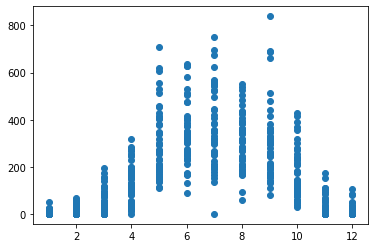

In [12]:
dhaka = mdf[mdf['Station'] == 'Dhaka']
plt.scatter(dhaka["Month"], dhaka['Rainfall'])


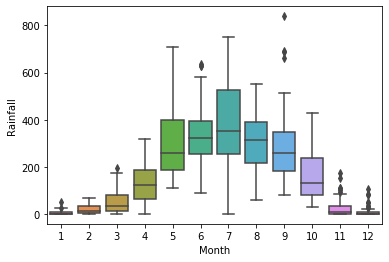

In [13]:
sns.boxplot(dhaka["Month"], dhaka['Rainfall'])

In [14]:
train_dhaka = train[train['Station'] == 'Dhaka']
train_dhaka

,Year,Station,Month,Rainfall,StationIndex
84,1970,Dhaka,1,16,9
85,1970,Dhaka,2,8,9
86,1970,Dhaka,3,23,9
87,1970,Dhaka,4,45,9
88,1970,Dhaka,5,192,9
...,...,...,...,...,...
13702,2009,Dhaka,8,482,9
13703,2009,Dhaka,9,298,9
13704,2009,Dhaka,10,74,9
13705,2009,Dhaka,11,4,9


In [15]:
test_dhaka = test[test['Station']=='Dhaka']
test_dhaka

,Year,Station,Month,Rainfall,StationIndex
14091,2010,Dhaka,1,0,9
14092,2010,Dhaka,2,48,9
14093,2010,Dhaka,3,22,9
14094,2010,Dhaka,4,37,9
14095,2010,Dhaka,5,177,9
...,...,...,...,...,...
16474,2016,Dhaka,8,171,9
16475,2016,Dhaka,9,138,9
16476,2016,Dhaka,10,76,9
16477,2016,Dhaka,11,25,9


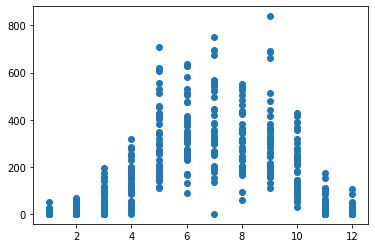

In [16]:
plt.scatter(train_dhaka['Month'], train_dhaka['Rainfall'])

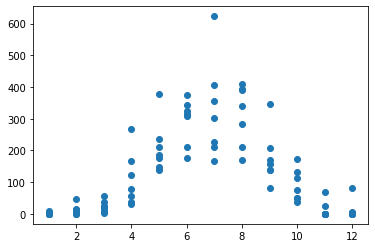

In [17]:
plt.scatter(test_dhaka['Month'], test_dhaka['Rainfall'])

In [18]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x-mu, 2)/(2*np.power(sig, 2)))

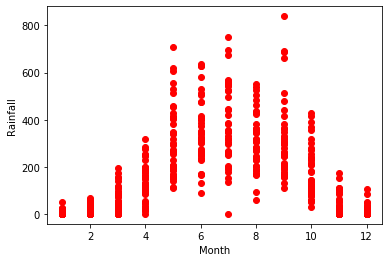

In [19]:
x_train, y_train = (train_dhaka['Month'].values, train_dhaka['Rainfall'].values)
plt.plot(x_train, y_train, 'ro')
plt.ylabel('Rainfall')
plt.xlabel('Month')
plt.show()

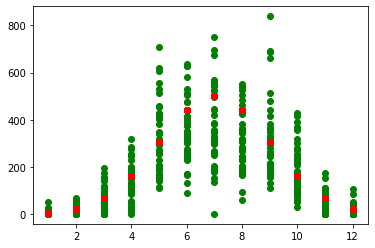

In [20]:
mu = 7
sig = 2
y_pred = gaussian(x_train, mu, sig)
plt.plot(x_train, y_train, 'go')
plt.plot(x_train, y_pred*500, 'ro')

normalization

In [21]:
x_data = x_train/max(x_train)
y_data = y_train/max(y_train)

In [22]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(gaussian, x_data, y_data)
#print the final parameters
print(" mu = %f, sig = %f" % (popt[0], popt[1]))

 mu = 10.148553, sig = 5.445154


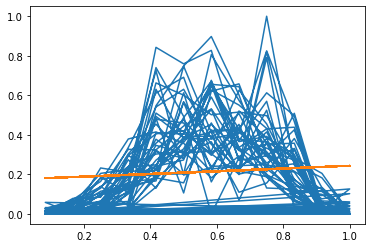

In [23]:
plt.plot(x_data, y_data)
plt.plot(x_data, gaussian(x_data, *popt))

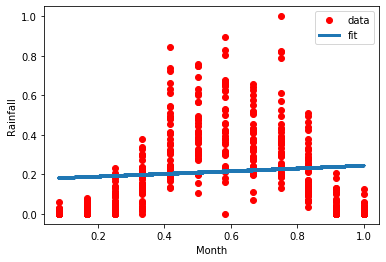

In [24]:
y = gaussian(x_data, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Rainfall')
plt.xlabel('Month')
plt.show()

This work is not finished. There is much to do with this dataset. Thank you for your kind attention.